In [4]:
def sorted_ratings(ratings):
    return list(sorted(ratings, key=lambda d: d['time']))

4109
9585


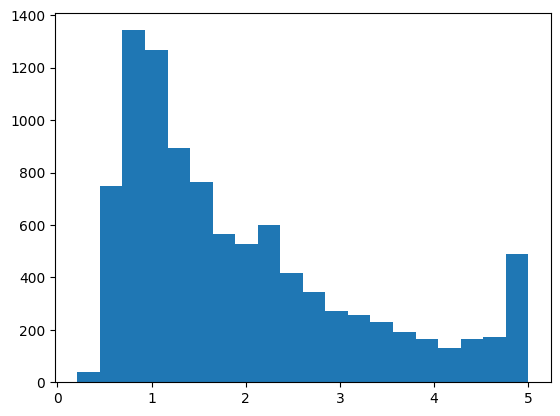

In [5]:
import matplotlib.pyplot as plt
import pickle

user_ratings = pickle.load(open('../pickles/user_ratings5.pkl', 'rb'))

temp = []
user_courses = {}
useful_user_ratings = {}
for user, courses in user_ratings.items():
    if len(courses) > 1:
        
        user_courses[user] = list(map(lambda x: x['course'], courses))
        prev_time = 0
        ratings = sorted_ratings(courses)
        useful_user_ratings[user] = list(map(lambda x: (x['course'], x['rating']), ratings))
        for rating in ratings:
            if prev_time > rating['time']:
                print(ratings)
            prev_time = rating['time']
            temp.append(rating['rating']) 
print(len(user_courses.keys()))
print(len(temp))

plt.hist(temp, bins=20)
plt.show()

In [7]:
import pandas as pd


def split_ratings_df(user_ratings) -> pd.DataFrame:
    temp = []
    for user, courses in user_ratings.items():
        for course in courses[:-1]:
            temp.append([user, course[0], course[1]])
    train_ratings_df = pd.DataFrame(temp, columns=['user', 'course', 'rating'])
    temp = []
    for user, courses in user_ratings.items():
        for course in courses[-1:]:
            temp.append([user, course[0], course[1]])
    test_ratings_df = pd.DataFrame(temp, columns=['user', 'course', 'rating'])
    return train_ratings_df, test_ratings_df

In [8]:
train, test = split_ratings_df(useful_user_ratings)
train.to_feather("../data/MOOCCubeX/train_ratings.feather")
test.to_feather("../data/MOOCCubeX/test_ratings.feather")

In [13]:
train

,user,course,rating
0,U_2452,C_697684,1.805788
1,U_6286,C_1886678,0.962250
2,U_11731,C_1997524,2.192645
3,U_24067,C_1646044,2.540003
4,U_24067,C_2316355,3.810004
...,...,...,...
5471,U_35899093,C_1996570,0.883883
5472,U_35905892,C_1912004,0.957826
5473,U_36010983,C_784161,1.496264
5474,U_36033126,C_1912004,0.957826


In [12]:
test

,user,course,rating
0,U_2452,C_2059297,1.091089
1,U_6286,C_1842789,4.264014
2,U_11731,C_1811739,1.336306
3,U_24067,C_948101,0.762493
4,U_24277,C_1732839,0.816497
...,...,...,...
4104,U_35899093,C_735197,0.762493
4105,U_35905892,C_1925898,2.013468
4106,U_36010983,C_2199449,1.104315
4107,U_36033126,C_1925898,1.423737
